In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ROOT = Path().resolve().parent    # go up one level from src/
RAW = ROOT / "data" / "raw"
PROCESSED = ROOT / "data" / "processed" 

DATA_MODEL = pd.read_parquet(PROCESSED / "FULL_MODEL_INPUTS_OUTPUT.parquet")
DATA_MODEL


,year,PERMNO,DQS,PRS,leverage,equity_ratio,asset_growth,ROA,ROE,book-to-market,cash_ratio,log_mktcap,sigma_idio_ann
0,2016,10001,0.454567,0.490094,0.350717,0.470850,-0.001340,0.002598,0.005519,0.704081,0.032737,4.882999,0.409311
1,2017,10001,0.971758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,10025,0.884946,-0.021613,0.345171,0.288546,-0.108072,0.073356,0.254228,0.190812,0.009362,6.386434,0.469507
3,2017,10025,0.928386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,10026,0.717028,-0.021613,0.002024,0.807065,0.064006,0.096112,0.119088,0.255728,0.195058,7.821940,0.178008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76738,2020,93436,0.478218,0.795722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.585316
76739,2021,93436,0.456581,0.795722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.390072
76740,2022,93436,0.461577,0.795722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.326525
76741,2023,93436,0.926950,0.795722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.255409


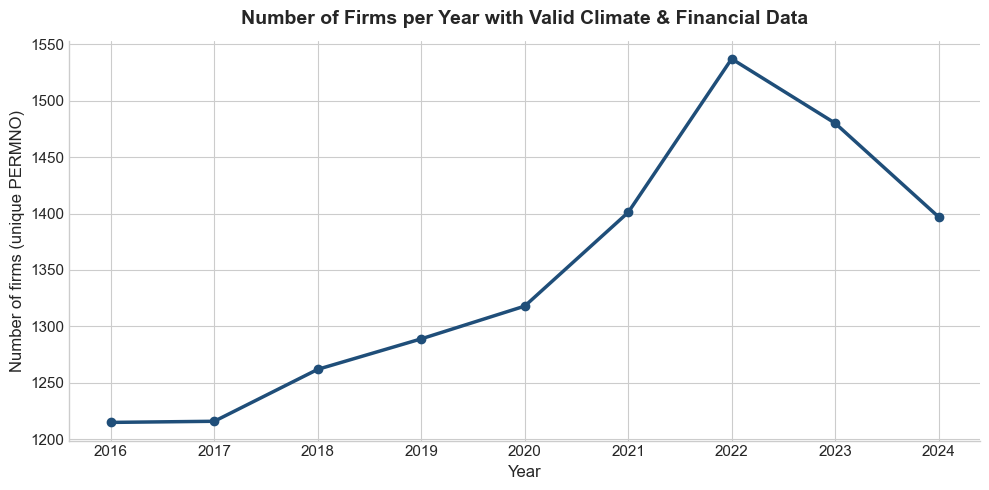

In [7]:
# Define "valid observation"
valid_mask = (
    DATA_MODEL["sigma_idio_ann"].notna() &
    DATA_MODEL["PRS"].notna() &
    DATA_MODEL["DQS"].notna() &
    DATA_MODEL["leverage"].notna()
)

df_valid = DATA_MODEL.loc[valid_mask].copy()

permno_per_year = (
    df_valid
    .groupby("year")["PERMNO"]
    .nunique()
    .reset_index(name="n_firms")
)

plt.style.use("seaborn-v0_8-whitegrid")

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    permno_per_year["year"],
    permno_per_year["n_firms"],
    linewidth=2.5,
    marker="o",
    markersize=6,
    color="#1f4e79"
)

# Labels and title
ax.set_title(
    "Number of Firms per Year with Valid Climate & Financial Data",
    fontsize=14,
    weight="bold",
    pad=12
)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Number of firms (unique PERMNO)", fontsize=12)

# Improve ticks
ax.tick_params(axis="both", labelsize=11)
ax.set_xticks(permno_per_year["year"])

# Remove chart junk
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

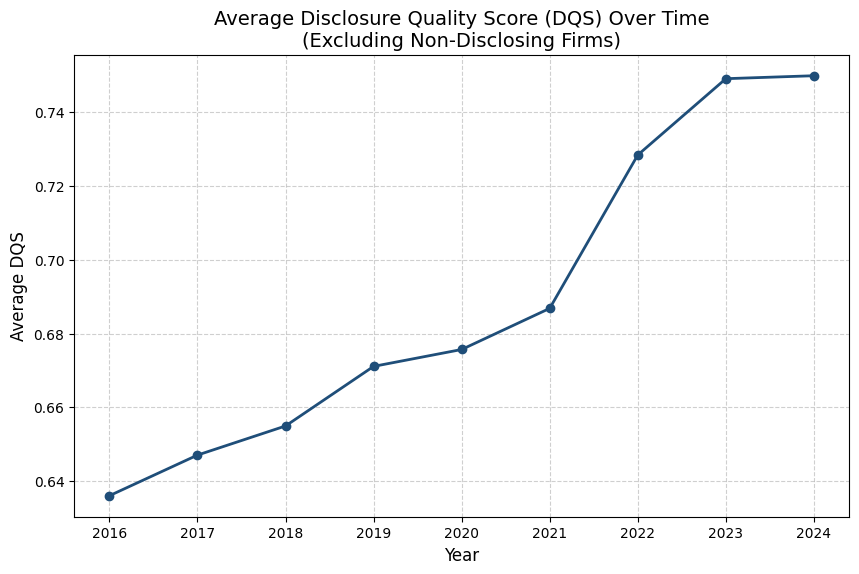

In [5]:
# 1. Filter: Select only rows where DQS > 0
#    We use the variable 'DATA_MODEL' seen in your screenshots
dqs_active = DATA_MODEL[DATA_MODEL['DQS'] > 0].copy()

# 2. Aggregate: Group by 'year' and calculate the mean
avg_dqs_per_year = dqs_active.groupby('year')['DQS'].mean()

# 3. Plot
plt.figure(figsize=(10, 6))
plt.plot(avg_dqs_per_year.index, avg_dqs_per_year.values, marker='o', linestyle='-', color="#1f4e79", linewidth=2)

# Formatting
plt.title('Average Disclosure Quality Score (DQS) Over Time\n(Excluding Non-Disclosing Firms)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average DQS', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(avg_dqs_per_year.index) # Ensure all years are labeled

plt.show()